# Rabioscillations

## Read and Plot Data

['Time (us)', ' counts']
['Time (us)', ' counts']
['Time (us)', ' counts']
['Time (us)', ' counts']


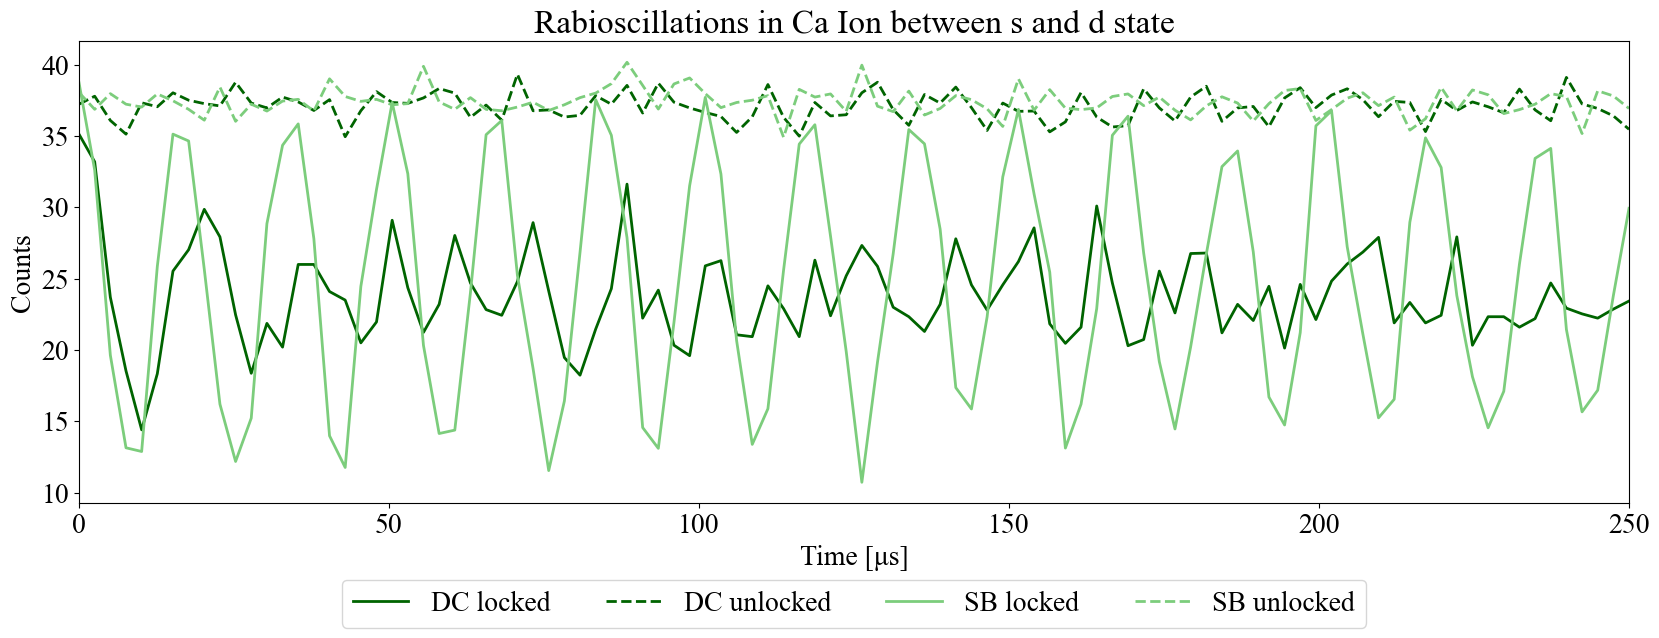

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# File paths
DC_locked = r'C:\Users\samse\Desktop\Blockkurs\07-UltracoldIons\Repository\Datenanalysis_Rabioscillations\RawData\Doppler_cooling_729_locked_raw_249137.txt'
DC_unlocked = r'C:\Users\samse\Desktop\Blockkurs\07-UltracoldIons\Repository\Datenanalysis_Rabioscillations\RawData\Doppler_cooling_729_unlocked_raw_249142.txt'
SB_locked = r'C:\Users\samse\Desktop\Blockkurs\07-UltracoldIons\Repository\Datenanalysis_Rabioscillations\RawData\SB_cooling_729_locked_raw_249139.txt'
SB_unlocked = r'C:\Users\samse\Desktop\Blockkurs\07-UltracoldIons\Repository\Datenanalysis_Rabioscillations\RawData\SB_cooling_729_unlocked_raw_249143.txt'

def load(file):
    # Read file
    with open(file, 'r') as f:
        lines = f.readlines()
    
    # Extract headers
    headers = lines[0].strip().split(',')
    print(headers)  # For debugging
    data = [list(map(float, line.strip().split(','))) for line in lines[1:]]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=headers)

    # Extract x and y values
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    return x, y 

# Load data for each file
x_DC_locked, y_DC_locked = load(DC_locked)
x_DC_unlocked, y_DC_unlocked = load(DC_unlocked)
x_SB_locked, y_SB_locked = load(SB_locked)
x_SB_unlocked, y_SB_unlocked = load(SB_unlocked)
    
# Plot the data
# Set font properties for plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

plt.figure(figsize=(20, 6))

plt.plot(x_DC_locked, y_DC_locked, label='DC locked', color='#006400', linewidth=2)
plt.plot(x_DC_unlocked, y_DC_unlocked, label='DC unlocked', color='#006400', linewidth=2, linestyle='--')
plt.plot(x_SB_locked, y_SB_locked, label='SB locked', linewidth=2, color='#7CCD7C')
plt.plot(x_SB_unlocked, y_SB_unlocked, label='SB unlocked', color='#7CCD7C', linewidth=2, linestyle='--')


plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=4)
plt.xlabel('Time [μs]')
plt.ylabel('Counts')
plt.title('Rabioscillations in Ca Ion between s and d state')
plt.xlim(0,250)

#plt.gca().set_facecolor('#ffffe0')
# Show the plot
plt.show()  # <- Add parentheses to call the function


## Try to fit dacay of locked - only doppler cooling

Optimized Parameters:
A = 11.68, B = 0.035, Omega = 0.352, Phi = -0.44, C = 23.66
Decay constant τ = 28.733 µs (related to laser coherence)
Uncertanty is: [1.78113777 0.00823223 0.00912031 0.18836713 0.25403366]


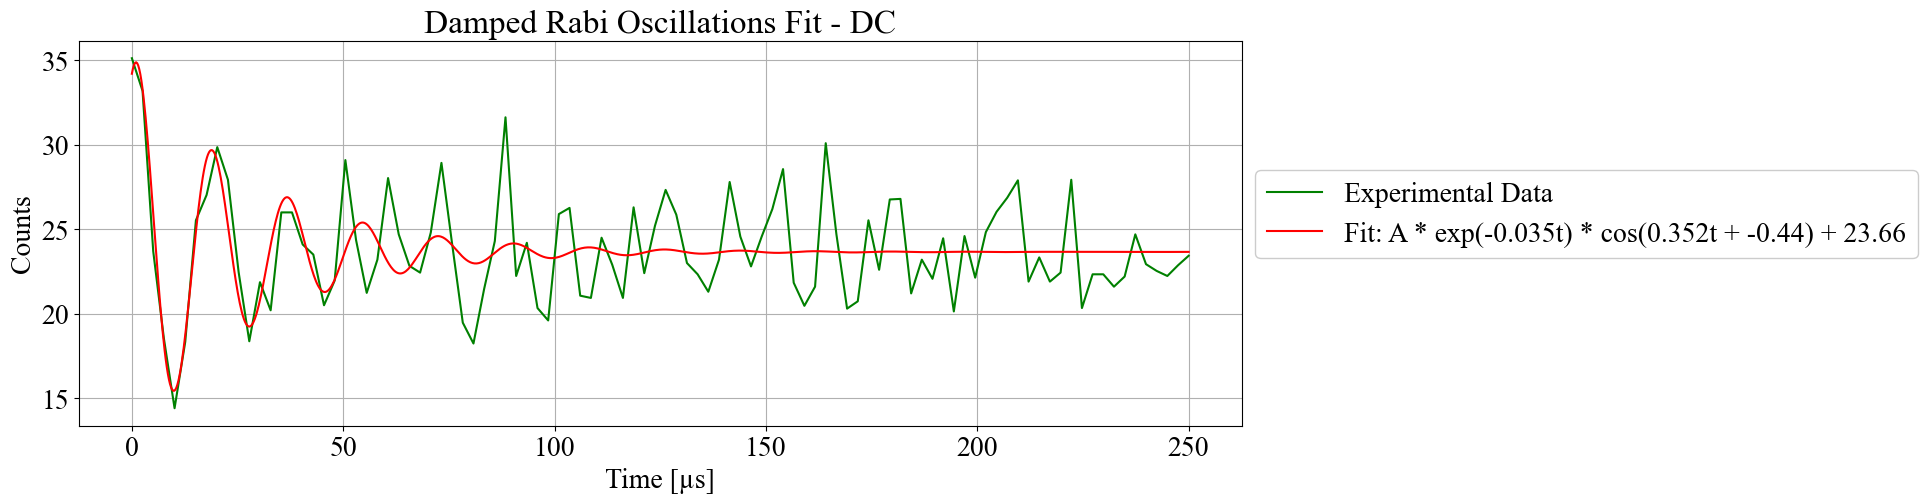

In [88]:
# Plot the data
# Set font properties for plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Define damped Rabi oscillation function
def damped_sine(t, A, B, omega, phi, C):
    return A * np.exp(-B * t) * np.cos(omega * t + phi) + C

def initial_guess_and_fit(X,Y):
    # Initial parameter guesses: (A, B, omega, phi, C)
    A_guess = max(Y) - min(Y)  
    B_guess = 0.01  # Rough estimate of decay rate
    omega_guess = 0.2  # Estimate based on oscillation period
    phi_guess = 0  # Assume zero phase offset initially
    C_guess = np.mean(Y[-10:])  # Approximate baseline

    initial_guess = [A_guess, B_guess, omega_guess, phi_guess, C_guess]

    # Fit the data
    popt, pcov = curve_fit(damped_sine, X, Y, p0=initial_guess)

    # Extract best-fit parameters
    A_opt, B_opt, omega_opt, phi_opt, C_opt = popt
    global tau_opt
    tau_opt = 1 / B_opt  # Characteristic decay time

    # Generate fitted curve
    time_fit = np.linspace(min(X), max(X), 1000)
    counts_fit = damped_sine(time_fit, *popt)

    # Calculate standard deviation (uncertainty) of the parameters
    perr = np.sqrt(np.diag(pcov))

    plt.figure(figsize=(15,5))


    plt.plot(X, Y, label="Experimental Data", color="green")
    plt.plot(time_fit, counts_fit, label=f"Fit: A * exp(-{B_opt:.3f}t) * cos({omega_opt:.3f}t + {phi_opt:.2f}) + {C_opt:.2f}", color="red")
    plt.xlabel("Time [µs]")
    plt.ylabel("Counts")
    #plt.title("Damped Rabi Oscillations Fit")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.7), framealpha=1, ncol=1)
    plt.grid()
    

    # Print results
    print(f"Optimized Parameters:")
    print(f"A = {A_opt:.2f}, B = {B_opt:.3f}, Omega = {omega_opt:.3f}, Phi = {phi_opt:.2f}, C = {C_opt:.2f}")
    print(f"Decay constant τ = {tau_opt:.3f} µs (related to laser coherence)")
    print("Uncertanty is:", perr)
    

initial_guess_and_fit(x_DC_locked,y_DC_locked)
plt.title("Damped Rabi Oscillations Fit - DC")
plt.show()
#y(t)=Ae−Btcos(ωt+ϕ)+C


---------------------

Achtung!! Hier ist omega = 1/tau die effektive linienbreite (entspricht nicht der realen des lasers (effectiv means in respect to something)!)

von 0 bis 50 mus sind wir noch einigermassen coherent und der fit ist gut. danach fit schleicht -  laser out of coherence und wir sehen nur noch noise. das ist weil wir nur doppler cooling haben, das bedeutet unser atom ist immer noch in bewegung und verschlechtert die coherence obwohl der laser locked ist und sehr narrow! 

------------------


$y(t) = A e^{-Bt} cos(\omega t + \phi) + C$

A = initial apmplitude of oscillations
B = Decay constant due to decoherence (related to laser coherence time)
$\omega$ = rabi freqeuncy 
$\phi$ = phase offset
C = baseline offset (accounting of background counts)

term $e^{-Bt}$ accounts for the loss of coherence over time -> $\tau$ = $\frac{1}{B}$

## Fit cosinus curve with decay to locked laser with sideband cooling

Optimized Parameters:
A = 13.23, B = 0.001, Omega = 0.374, Phi = -0.03, C = 24.83
Decay constant τ = 829.756 µs (related to laser coherence)


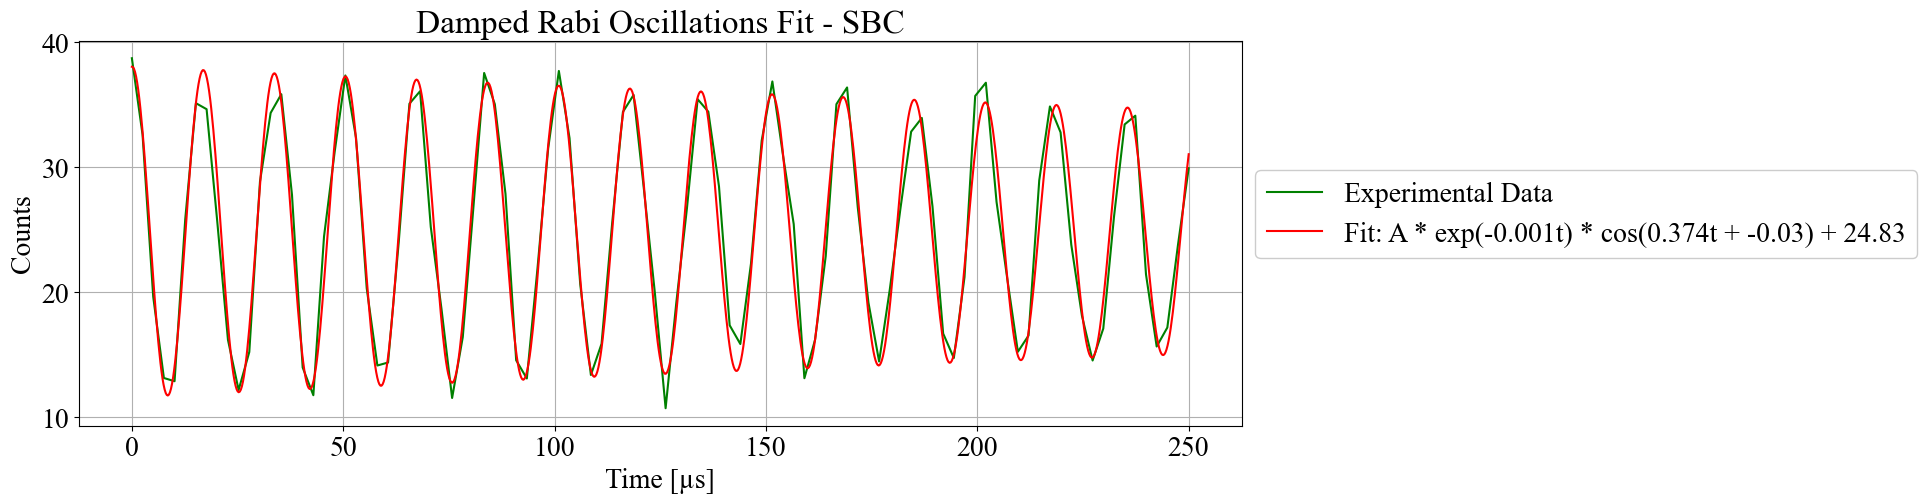

Natural linewidth is: 1.20517 kHz


In [87]:
initial_guess_and_fit(x_SB_locked,y_SB_locked)
plt.title("Damped Rabi Oscillations Fit - SBC")
plt.show()

FWHM_rho = 1 / (tau_opt* 1e-6)
print("Natural linewidth is:", round(FWHM_rho,2) * 1e-3, "kHz")
